### 1. Import Libraries and Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### 2. Load Dataset

In [25]:
df=pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3.Data Preprocessing :

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [27]:
# Drop 'id' column and any missing values if present
df.drop(columns=['id'], inplace=True)
df.dropna(inplace=True)

In [28]:
# Encode diagnosis (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [29]:
#df.head()

In [30]:
# Features and Target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [31]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### Train/test split

In [33]:
### Train SVM Models

In [34]:
# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)


SVC(C=1)

### Visualize Decision Boundaries

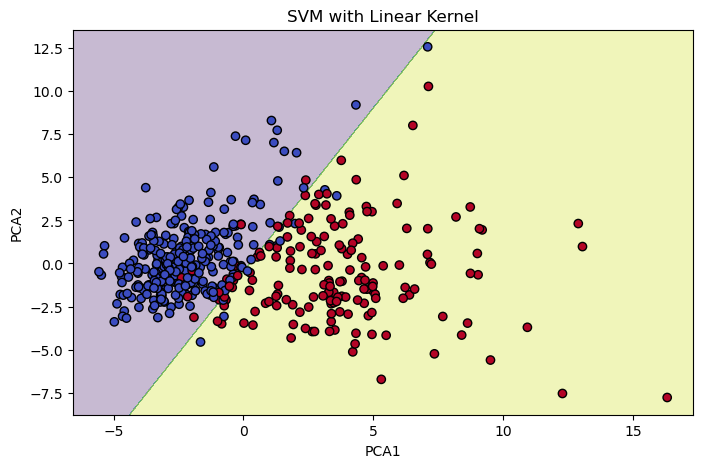

In [ ]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

plot_decision_boundary(svm_linear, X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM with RBF Kernel")

### Hyperparameter Tuning

In [ ]:
# Tune RBF SVM using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 0.1, 1, 10]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters Found:", grid.best_params_)

### Cross-Validation and Performance

In [ ]:
# Best model evaluation
best_model = grid.best_estimator_

# Cross-validation on full data (X_scaled for all features)
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Test set evaluation
y_pred = best_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))